In [60]:
from firebase import firebase
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
import warnings
import json
warnings.filterwarnings('ignore')

In [61]:
firebaseObj = firebase.FirebaseApplication('https://demodemo-96d74-default-rtdb.firebaseio.com/', None)
result = firebaseObj.get('/', None)

In [84]:
rows = []
for i in result['pre-midterm']:
    for j in result['pre-midterm'][i]:
        result['pre-midterm'][i][j]['ID'] = j
        rows.append(result['pre-midterm'][i][j])

In [85]:
df = pd.DataFrame(rows)

In [86]:
df

,level,levelTimeLine,outcome,platformCords,userID,ID
0,0,14,1,"{x:0.5084957,y:-2.200433},{x:-9.494595,y:3.667...",09b10fcd-8ba9-4287-bafa-7b7c8ba6e929,-NOmIaHEaJ4lQYOG8He9
1,1,3,0,"{x:0.5084957,y:-2.200433},{x:-9.494595,y:3.667...",09b10fcd-8ba9-4287-bafa-7b7c8ba6e929,-NOmIb5aMVUBjtnm3iIv
2,1,15,0,"{x:0.5084957,y:-2.200433},{x:-9.494595,y:3.667...",09b10fcd-8ba9-4287-bafa-7b7c8ba6e929,-NOmIf-7NO5y7jfl_FnH
3,1,15,0,"{x:0.5084957,y:-2.200433},{x:-9.494595,y:3.667...",09b10fcd-8ba9-4287-bafa-7b7c8ba6e929,-NOmIiu8oPXiPrjIHXN9
4,0,4,0,"{x:2.114864,y:-1.864357},",09b10fcd-8ba9-4287-bafa-7b7c8ba6e929,-NOmN9tTXJOzs_Z8H-ek
...,...,...,...,...,...,...
548,0,7,1,,e5ab32e9-8cc7-47a0-a9d1-72daffe461a2,-NP9oNyt7kOvE3tjmpHN
549,1,7,0,"{x:-11.49722,y:-3.101616},",e5ab32e9-8cc7-47a0-a9d1-72daffe461a2,-NP9oPlQOzlwsoBjXffK
550,1,20,0,"{x:-11.50635,y:-3.042166},",e5ab32e9-8cc7-47a0-a9d1-72daffe461a2,-NP9oUhZvOnYmq_qjBd4
551,1,5,0,"{x:-9.863338,y:-2.811897},",e5ab32e9-8cc7-47a0-a9d1-72daffe461a2,-NP9oW6DaEBGbFOfaqUR


In [87]:
dfTime = df[df["outcome"] == 1]

## Avearge time taken to complete the level vs the level graph ( Metric #1)

This tells us, on average, how much time the user takes to complete the level. 
We collected the time players spent in each level to modify our design. 
We expect players to spend less than 3 minutes to pass each level. If most players spend more time than that, we should remove a part of our scene to avoid players feeling our game is boring.



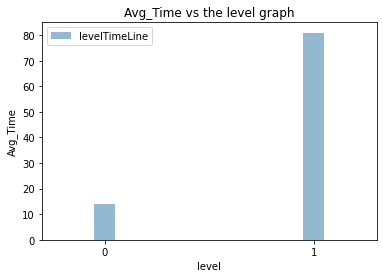

In [88]:
bar_width = 0.35
dfval = pd.pivot_table(dfTime, values='levelTimeLine', aggfunc=['mean', 'count'], index='level')
dfval.plot.bar(use_index=True, y='mean', rot=0, color='#95b8d1',width=0.1)
plt.xlabel('level')
plt.ylabel('Avg_Time')
plt.title('Avg_Time vs the level graph')
plt.show()

## User retention rate ( Metric #2)

We tracked the players who keep continuing the game till the end, i.e., players who find our game interesting and play all the levels. These metrics let us know about the game engagement. We expect the game plays for the higher levels to decrease gradually. 
This hints towards less motivation to continue to higher levels.


27
22


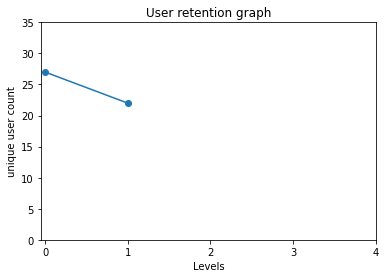

In [89]:
val0 = df[(df["level"] == 0)] 
val0 = val0.drop_duplicates(subset=["userID"])
print(len(val0))

val1 = df[(df["level"] == 1)] 
val1 = val1.drop_duplicates(subset=["userID"])
print(len(val1))

userRetentionDF = pd.DataFrame({
    'x_axis': [0,1],
    'y_axis':[len(val0), len(val1)]
})

plt.plot('x_axis', 'y_axis', data=userRetentionDF, linestyle='-', marker='o')
plt.xticks(np.arange(0,5))
plt.title('User retention graph')
plt.xlabel('Levels')
plt.ylabel('unique user count')
plt.yticks(np.arange(0,40, 5)) 
plt.show()

## Win/Loss vs. levels ( Metric #3)

Are users dying more in the higher levels? Is the number of completions dropping more than expected (hinting at a lack of user interest or too difficult of a level)? As the complexity increases, there may be less motivation to continue onto higher levels. This will provide feedback on the harder levels of the game and help point to hard-to-overcome obstacles that could potentially cause the player to exit the game/skip level.



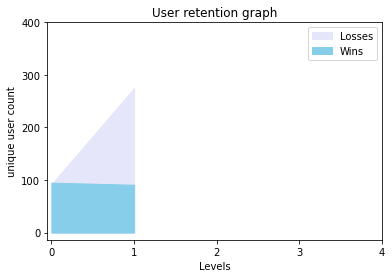

In [134]:
# Create data
x=range(0,2)
y=[df[(df["outcome"] == 0) & (df["level"] == 0)]['outcome'].count(),df[(df["outcome"] == 0) & (df["level"] == 1)]['outcome'].count()]
y2= [df[(df["outcome"] == 1) & (df["level"] == 0)]['outcome'].count(),df[(df["outcome"] == 1) & (df["level"] == 1)]['outcome'].count()]

# Area plot
plt.fill_between(x, y, color= 'lavender', label = "Losses")
plt.fill_between(x, y2, label = "Wins" , color= 'skyblue')
plt.xticks(np.arange(0,5))
plt.title('User retention graph')
plt.xlabel('Levels')
plt.ylabel('unique user count')
plt.yticks(np.arange(0,500, 100)) 
plt.legend()
plt.show()

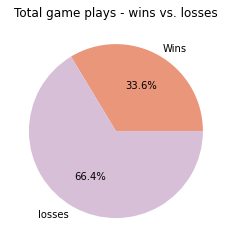

In [133]:
y = np.array([df[(df["outcome"] == 1)].shape[0], df[(df["outcome"] == 0)].shape[0]])
mylabels = ["Wins", "losses"]
mycolors = ["darksalmon", "thistle"]

plt.pie(y, labels = mylabels,colors = mycolors, autopct='%.1f%%')
plt.title('Total game plays - wins vs. losses')
plt.show() 

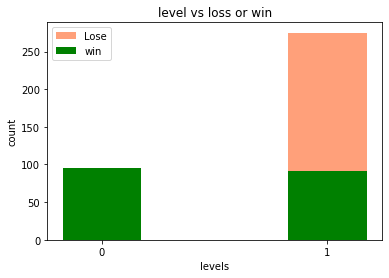

In [135]:
bar_width = 0.35
fig, ax = plt.subplots()
level0loss = ax.bar(df[df["level"] == 0]['level'],df[(df["outcome"] == 0) & (df["level"] == 0)]['outcome'].count(),bar_width, label = "Lose" , color = 'lightsalmon')
level0loss = ax.bar(df[df["level"] == 0]['level'],df[(df["outcome"] == 1) & (df["level"] == 0)]['outcome'].count(),bar_width, label = "win", color = 'green')
level1loss = ax.bar(df[df["level"] == 1]['level'],df[(df["outcome"] == 0) & (df["level"] == 1)]['outcome'].count(),bar_width, color = 'lightsalmon')
level1win = ax.bar(df[df["level"] == 1]['level'], df[(df["outcome"] == 1) & (df["level"] == 1)]['outcome'].count(),bar_width, color = 'green')
ax.set_xlabel('levels')
ax.set_ylabel('count')
ax.set_title('level vs loss or win')
ax.set_xticks([0,1])
ax.set_xticklabels(["0","1"])
ax.legend()
plt.show()

## Platforms position when the level is Lost/Won ( Metric #4)

When the player wins/losses the level we get different insights on where they put the platform to either win/lose the game.  
This gives us the following insights -
- If the players understand where exactly to put the platforms when the level is completed.
- Strategy players use when they lose the game. 
- Different strategies to complete the level. This will tell us different places to put the platform and still be able to win the level.


In [153]:
def prepDf(dfTime):
    dfcoord = pd.DataFrame()
    for i in dfTime.index:
        dfTime['platformCords'][i] = dfTime['platformCords'][i][:-1]
        dfTime['platformCords'][i] = '{"coords": ['+dfTime['platformCords'][i]+ ']}'
        val = ''
        for j in range (len(dfTime['platformCords'][i])):
            if dfTime['platformCords'][i][j]  == 'x' or dfTime['platformCords'][i][j]  == 'y':
                val += '"'+dfTime['platformCords'][i][j]+'"'
            else:
                val+=dfTime['platformCords'][i][j]
        json_object = json.loads(val)
        if len(dfcoord.index) == 0:
            dfcoord = pd.DataFrame(json_object['coords'])
        else:
            dfcoord = pd.concat([dfcoord, pd.DataFrame(json_object['coords'])], ignore_index=True)
    return dfcoord

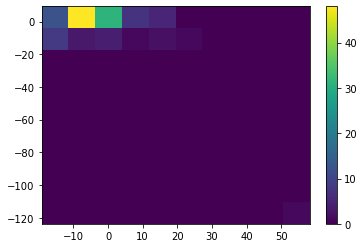

		 Level 0


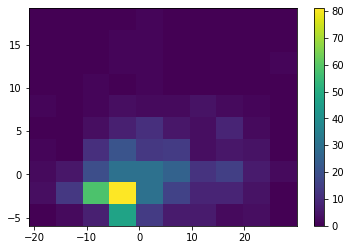

		 Level 1


In [154]:
#Plots for loss
for i in range(0,2):
    game = prepDf(df[(df["outcome"] == 0) & (df["level"] == i)])
    plt.hist2d(game['x'],game['y'])
    plt.colorbar()
    plt.show()
    print("\t\t Level",i)

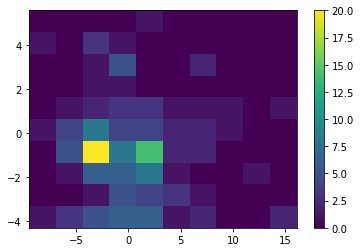

		 Level 0


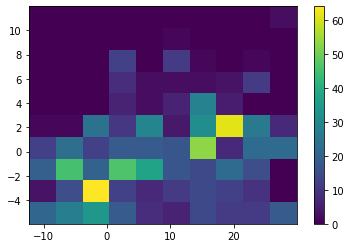

		 Level 1


In [155]:
#plots for win
for i in range(0,2):
    game = prepDf(df[(df["outcome"] == 1) & (df["level"] == i)])
    plt.hist2d(game['x'],game['y'])
    plt.colorbar()
    plt.show()
    print("\t\t Level",i)

## Death position of the player (Metric #5)

The position of the players before their death lets us know which part of the level is more difficult where most players die. This helps us in neutralizing the game in case the level becomes too difficult which might lead to players not continuing the further 

In [202]:
loss = df[df["outcome"] == 0]
def prepDeathDF(loss):
    deathcoord = pd.DataFrame()
    for i in loss.index:
        loss['platformCords'][i] = loss['platformCords'][i][:-1]
        loss['platformCords'][i] = '{"coords": ['+loss['platformCords'][i]+ ']}'
        val = ''
        for j in range (len(loss['platformCords'][i])):
            if loss['platformCords'][i][j]  == 'x' or loss['platformCords'][i][j]  == 'y':
                val += '"'+loss['platformCords'][i][j]+'"'
            else:
                val+=loss['platformCords'][i][j]
        json_object = json.loads(val)
        latval = len(json_object['coords']) -1
        if(latval>=0):
            last_obj = json_object['coords'][lastval]
            if len(deathcoord.index) == 0:
                deathcoord = pd.DataFrame({'x': last_obj['x'], 'y':last_obj['y']},index=[0])
            else:
                deathcoord = pd.concat([deathcoord, pd.DataFrame({'x':last_obj['x'], 'y': last_obj['y']},index=[0])], ignore_index=True)
    return deathcoord

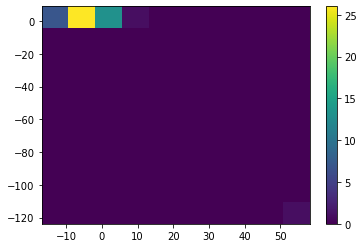

		 Level 0


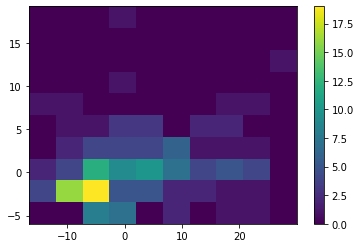

		 Level 1


In [204]:
for i in range(0,2):
    death = prepDeathDF(df[(df["outcome"] == 0) & (df["level"] == i)])
    plt.hist2d(death['x'],death['y'])
    plt.colorbar()
    plt.show()
    print("\t\t Level",i)